<a href="https://colab.research.google.com/github/vinaykuna0201/new-rainfall1/blob/main/new_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Rainfall.csv')
df.head()



,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50,15.3
2,3,1019.7,20.3,19.0,18.0,18.4,95,91,yes,0.0,40,14.2
3,4,1018.9,22.3,20.6,20.6,18.8,90,88,yes,1.0,50,16.9
4,5,1015.9,21.3,20.7,20.7,19.9,95,81,yes,0.0,40,13.7


In [3]:
df.shape


(62, 12)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            62 non-null     int64  
 1   pressure       62 non-null     float64
 2   maxtemp        62 non-null     float64
 3   temparature    62 non-null     float64
 4   mintemp        62 non-null     float64
 5   dewpoint       62 non-null     float64
 6   humidity       62 non-null     int64  
 7   cloud          62 non-null     int64  
 8   rainfall       62 non-null     object 
 9   sunshine       62 non-null     float64
 10  winddirection  62 non-null     int64  
 11  windspeed      62 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
day,62.0,31.500000,18.041619,1.0,16.25,31.50,46.750,62.0
pressure,62.0,961.850000,37.234546,906.5,928.05,961.05,993.950,1025.9
maxtemp,62.0,13.253226,8.554602,0.3,6.25,12.40,19.525,32.4
temparature,62.0,12.975806,8.173241,0.3,6.25,12.40,18.775,31.4
mintemp,62.0,10.906452,7.808841,0.1,4.75,9.30,17.025,29.2
dewpoint,62.0,18.206452,10.334660,0.8,10.10,18.60,25.300,39.9
humidity,62.0,56.016129,30.058136,0.0,30.50,61.00,84.000,96.0
cloud,62.0,38.532258,31.660969,0.0,7.00,34.50,67.500,95.0
sunshine,62.0,5.540323,4.139631,0.0,1.85,4.85,9.125,13.4
winddirection,62.0,175.096774,145.017999,0.0,40.00,89.50,327.500,358.0


Data Cleaning

In [ ]:
df.isnull().sum()


,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
df.columns


Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [4]:
df.rename(str.strip,
		axis='columns',
		inplace=True)

df.columns


Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [5]:
for col in df.columns:

    # Checking if the column contains
    # any null values
    if df[col].isnull().sum() > 0:
        val = df[col].mean()
        df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

Exploratory Data Analysis

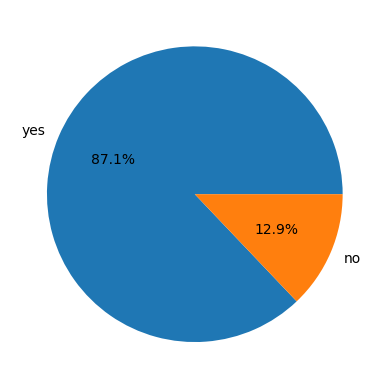

In [6]:
plt.pie(df['rainfall'].value_counts().values,
		labels = df['rainfall'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [7]:
df.groupby('rainfall').mean()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,56.750000,911.812500,26.000000,24.987500,23.050000,25.062500,89.500000,75.250000,1.837500,82.000000,9.262500
yes,27.759259,969.262963,11.364815,11.196296,9.107407,17.190741,51.055556,33.092593,6.088889,188.888889,11.068519


In [8]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)


['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


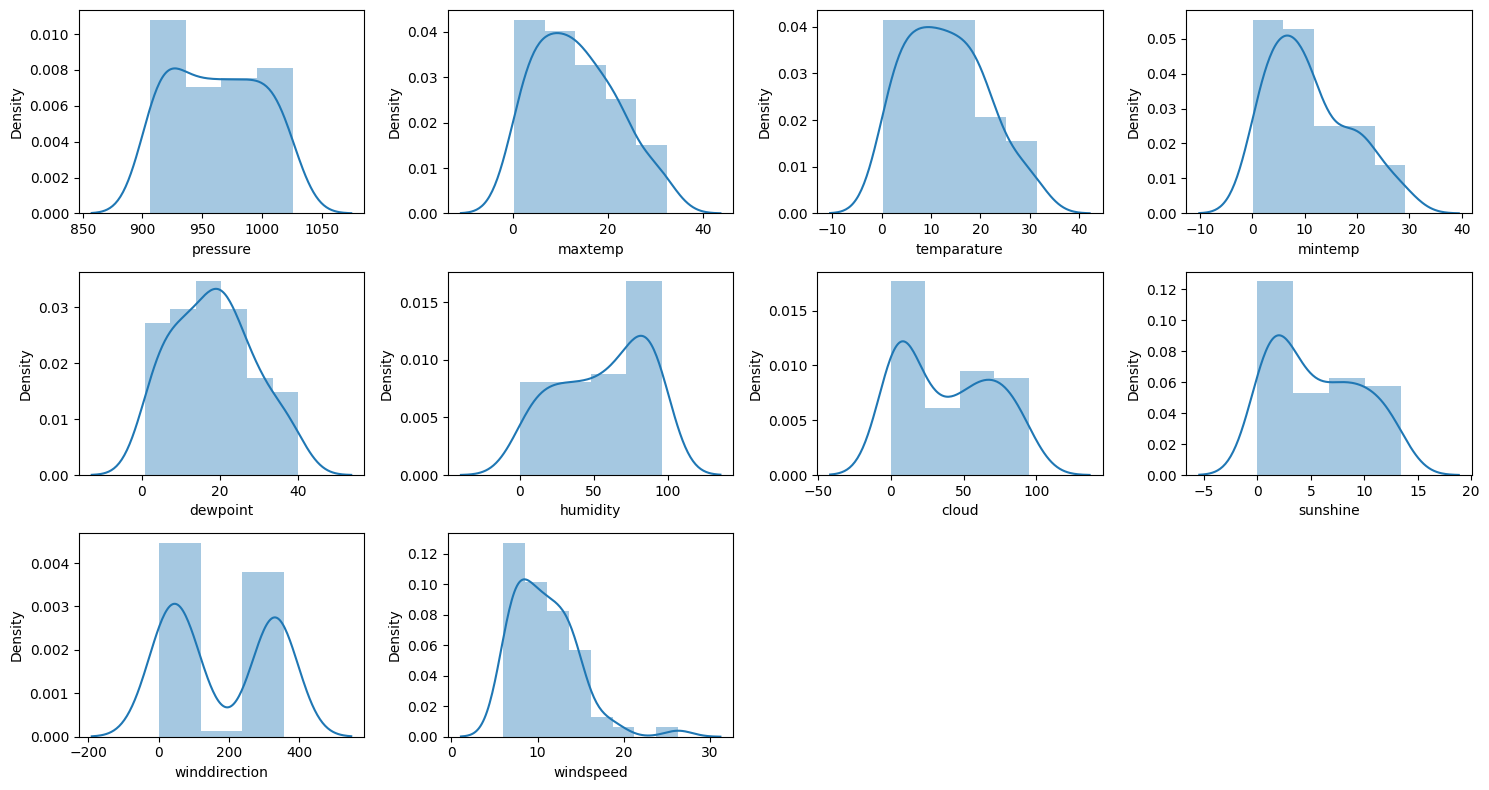

In [9]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


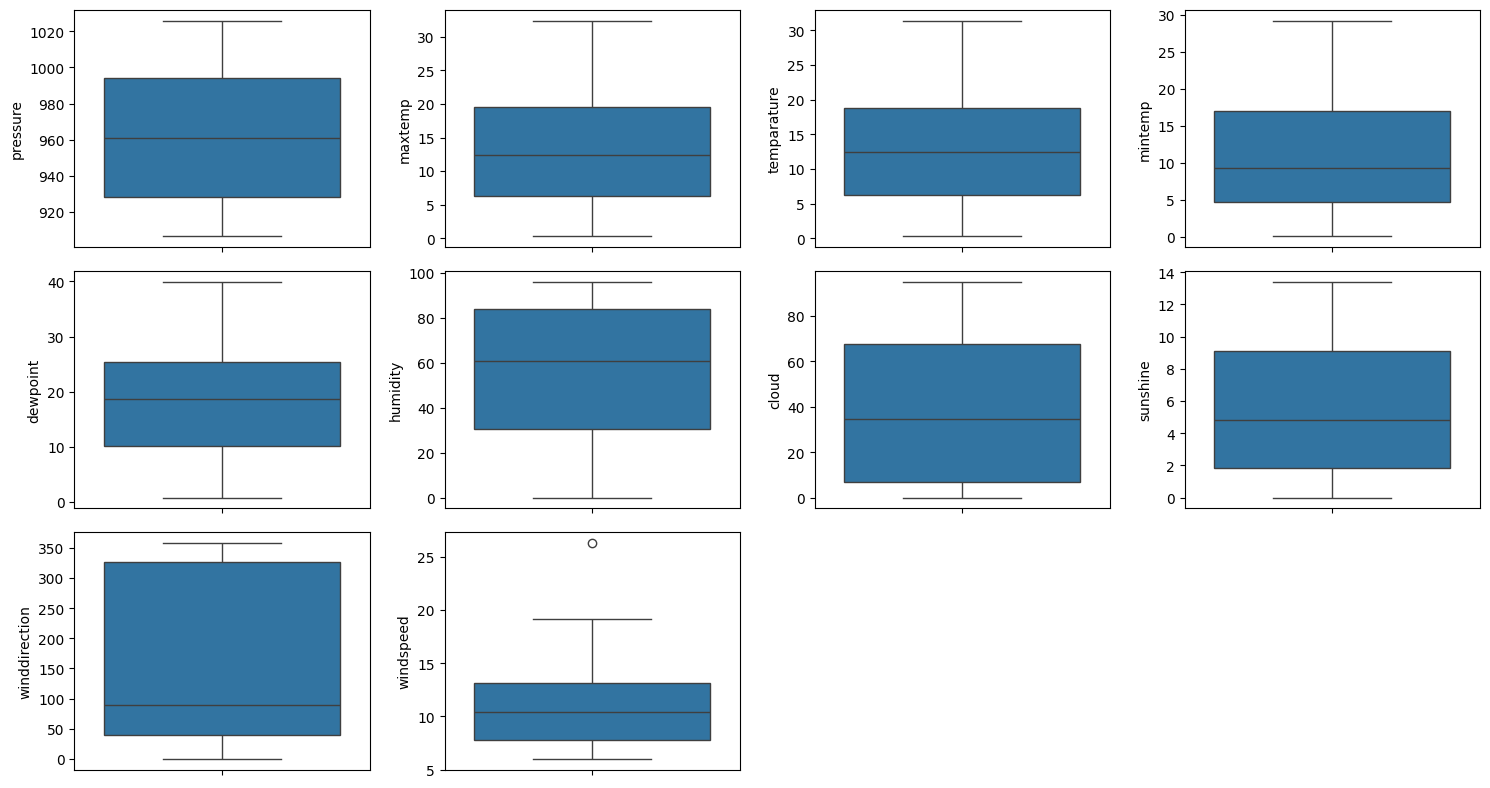

In [10]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [11]:
df.replace({'yes':1, 'no':0}, inplace=True)


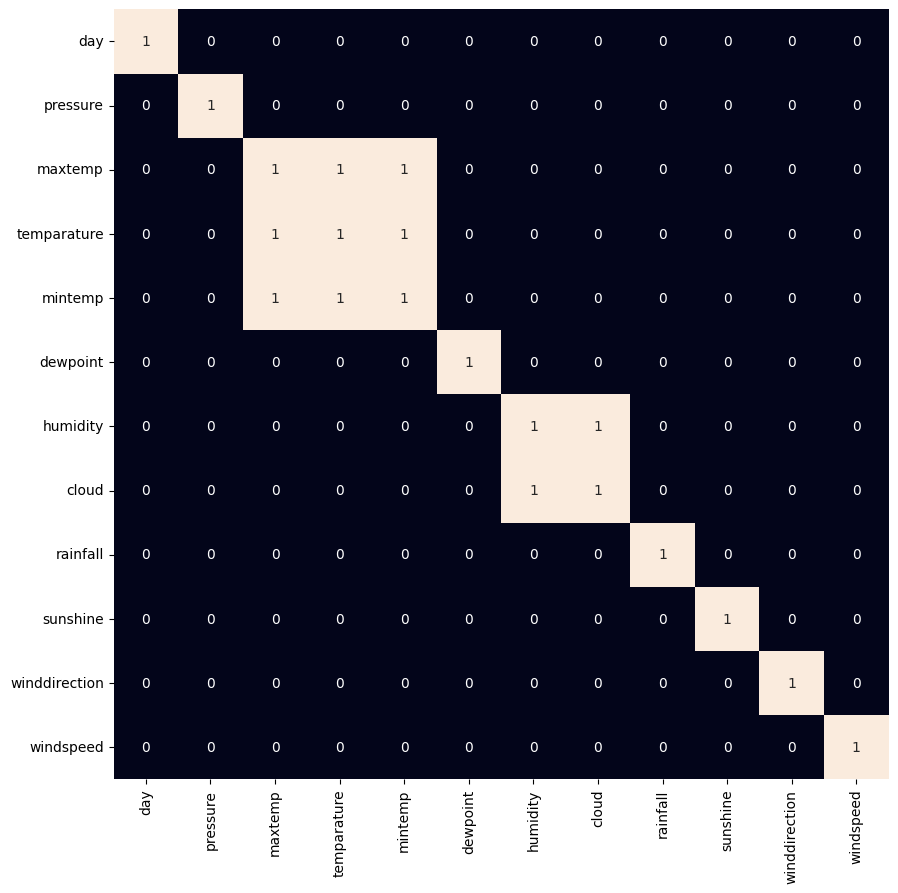

In [12]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [13]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)


Model Training,Model Evaluation

In [14]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall


In [19]:
X_train, X_test, \
	Y_train, Y_test = train_test_split(features,
									target,
									test_size=0.2,
									stratify=target,
									random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.



In [20]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:
predict = model.predict(X_test)

In [22]:
metrics.roc_auc_score(predict,Y_test)

0.7045454545454546

In [24]:
classification_report(predict,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.50      0.50      0.50         2\n           1       0.91      0.91      0.91        11\n\n    accuracy                           0.85        13\n   macro avg       0.70      0.70      0.70        13\nweighted avg       0.85      0.85      0.85        13\n'

In [25]:
confusion_matrix(predict,Y_test)

array([[ 1,  1],
       [ 1, 10]])

In [26]:
import pickle

In [28]:
pickle.dump(model,open('proj.pkl','wb'))


In [48]:

df.columns


Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')